In [4]:
#!pip install wordcloud
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import FreqDist
import matplotlib.pyplot as plt

In [5]:
nlp = pd.read_csv('nlp.csv')

In [6]:
nlp

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,main_cat,also_buy,also_view,similar_item,price,date,details,tech1,tech2,fit
0,0,2.0,False,"11 24, 2007",A1TOKUIUSJ77DU,B000PH9NNS,Gideon I. Gartner,"For former users of touch screens, this machin...",Tough Going,1195862400,...,Cell Phones & Accessories,NaN,"['B075FL4H89', 'B000PEOLAG', 'B00851Q9L0', 'B0...","[{'asin': '', 'href': '', 'name': 'Nokia E90 C...",404.47,NaN,NaN,NaN,NaN,NaN
1,1,4.0,False,"11 21, 2007",A2SK1UQ9HI9ZYS,B000PH9NNS,Ernesto D. Jimenez Perez,The product is fantastic but the software that...,Excellent phone Software in Beta phase,1195603200,...,Cell Phones & Accessories,NaN,"['B075FL4H89', 'B000PEOLAG', 'B00851Q9L0', 'B0...","[{'asin': '', 'href': '', 'name': 'Nokia E90 C...",404.47,NaN,NaN,NaN,NaN,NaN
2,2,5.0,True,"11 19, 2007",A1DQVXBQATAK2R,B000PH9NNS,Aldo Bender,I bought this phone to replace my Nokia 9300 a...,A real smartphone,1195430400,...,Cell Phones & Accessories,NaN,"['B075FL4H89', 'B000PEOLAG', 'B00851Q9L0', 'B0...","[{'asin': '', 'href': '', 'name': 'Nokia E90 C...",404.47,NaN,NaN,NaN,NaN,NaN
3,3,5.0,False,"09 25, 2007",A1PTDL2WFBL6GV,B000PH9NNS,ZANE Farooq,"I've used Nokia phones all my life, except wel...",Nokia...Wow,1190678400,...,Cell Phones & Accessories,NaN,"['B075FL4H89', 'B000PEOLAG', 'B00851Q9L0', 'B0...","[{'asin': '', 'href': '', 'name': 'Nokia E90 C...",404.47,NaN,NaN,NaN,NaN,NaN
4,4,4.0,False,"08 21, 2007",A3QP1VWPQS9S9D,B000PH9NNS,Paolo M. Reyes,The Nokia E90 Communicator is a mobile office ...,"E90, Eager to transform the way people experie...",1187654400,...,Cell Phones & Accessories,NaN,"['B075FL4H89', 'B000PEOLAG', 'B00851Q9L0', 'B0...","[{'asin': '', 'href': '', 'name': 'Nokia E90 C...",404.47,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10058,10058,1.0,True,"08 22, 2016",A3IESEK173F6ZZ,B01E6O625W,Kathleen Mulkey,"They are horrible, don't receive or make calls...",S4 sucks,1471824000,...,Cell Phones & Accessories,NaN,NaN,NaN,399.99,NaN,NaN,NaN,NaN,NaN
10059,10059,5.0,True,"08 12, 2016",A1JCA9NI8WSAEL,B01E6O625W,dasun kloss,Awesome phone!! Works great! Delivered early!!...,Five Stars,1470960000,...,Cell Phones & Accessories,NaN,NaN,NaN,399.99,NaN,NaN,NaN,NaN,NaN
10060,10060,5.0,True,"08 4, 2016",A3MYU5E9XUQJSO,B01E6O625W,Gail Roe,the phone work great got it before it was supp...,Five Stars,1470268800,...,Cell Phones & Accessories,NaN,NaN,NaN,399.99,NaN,NaN,NaN,NaN,NaN
10061,10061,5.0,True,"07 19, 2016",ANWZUOXV9MDGS,B01E6O625W,Kenneth Darnell,Great phone and a good deal,Five Stars,1468886400,...,Cell Phones & Accessories,NaN,NaN,NaN,399.99,NaN,NaN,NaN,NaN,NaN


In [7]:
# find out the brand list in dataset
nlp['brand'].unique()

array(['Nokia', 'Samsung', 'HTC', 'Sony', 'BlackBerry', 'LG', 'Apple'],
      dtype=object)

In [8]:
## split the dataset with brands
Nokia=nlp[nlp['brand'].str.contains('Nokia')]
Samsung=nlp[nlp['brand'].str.contains('Samsung')]
HTC=nlp[nlp['brand'].str.contains('HTC')]
Sony=nlp[nlp['brand'].str.contains('Sony')]
BlackBerry=nlp[nlp['brand'].str.contains('BlackBerry')]
LG=nlp[nlp['brand'].str.contains('LG')]
Apple=nlp[nlp['brand'].str.contains('Apple')]

In [9]:
##Create the new dataset of different brands
key = {'text':Nokia.reviewText}
Nokiatext = pd.DataFrame.from_dict(key)

In [10]:
Nokiatext

,text
0,"For former users of touch screens, this machin..."
1,The product is fantastic but the software that...
2,I bought this phone to replace my Nokia 9300 a...
3,"I've used Nokia phones all my life, except wel..."
4,The Nokia E90 Communicator is a mobile office ...
...,...
4065,My husband is very pleased with his Lumia 1520...
4066,Awesome!
4067,Perfect what i been waiting so long for
4068,This is best WP I have every owned. I love gor...


In [11]:
Nokiatext.reset_index(drop=True, inplace=True)

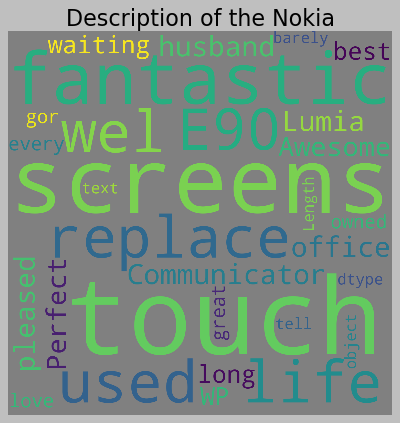

In [24]:
## upload the stopwords and use the wordcloud to create graph
stopwords = set(STOPWORDS)
stopwords.update(["phone","The","For",'could',"I've","bought",'It','For','except','Name','Nokia','The', 'For', 'It','users','machin','software','product','phones','mobile','former'])

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('classic')

wc = WordCloud(stopwords=stopwords, background_color = 'gray', width = 1500, height = 1500).generate(str(Nokiatext["text"]))
plt.title('Description of the Nokia', fontsize = 20)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [11]:
# Same with the rest of brands
## Samsung
key2 = {'text':Samsung.reviewText}
Samsungtext = pd.DataFrame.from_dict(key2)

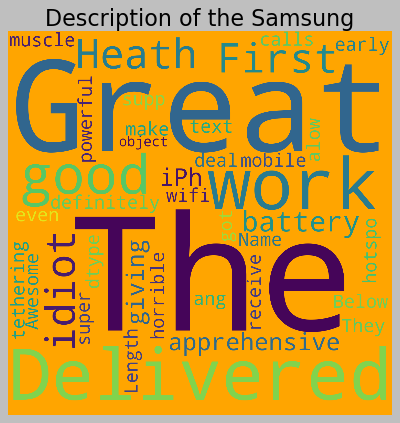

In [12]:
stopwords1 = set(STOPWORDS)
stopwords1.update(["phone","The","For",'could',"I've","bought",'It','For','except','Name'])

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('classic')

wc = WordCloud(stopwords=stopwords1, background_color = 'orange', width = 1500, height = 1500).generate(str(Samsungtext["text"]))
plt.title('Description of the Samsung', fontsize = 20)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [13]:
## HTC
key3 = {'text':HTC.reviewText}
HTCtext = pd.DataFrame.from_dict(key3)

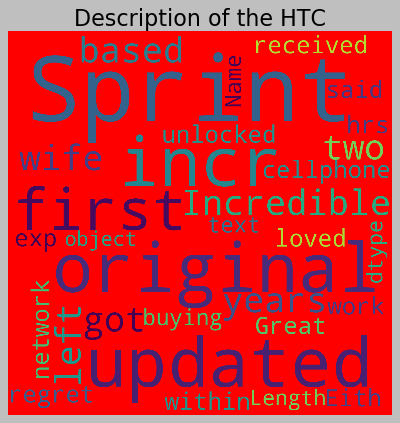

In [14]:
stopwords2 = set(STOPWORDS)
stopwords2.update(["phone","The","For",'could',"I've",'good','purchase',"bought",'It','For','except','Name','replaced','really','actually','purchased'])

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('classic')

wc = WordCloud(stopwords=stopwords2, background_color = 'red', width = 1500, height = 1500).generate(str(HTCtext["text"]))
plt.title('Description of the HTC', fontsize = 20)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [15]:
## Sony
key4 = {'text':Sony.reviewText}
Sonytext = pd.DataFrame.from_dict(key4)

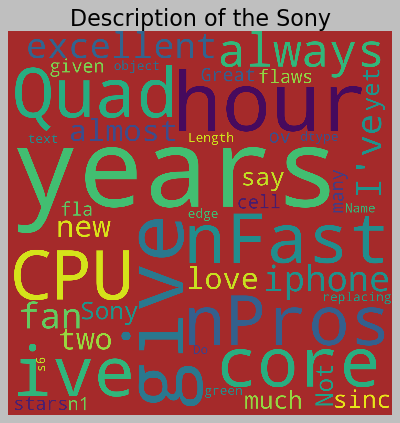

In [16]:
stopwords3 = set(STOPWORDS)
stopwords3.update(["phone","The","For",'could',"I've","bought",'It','For','except','Name','buy','review','try'])

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('classic')

wc = WordCloud(stopwords=stopwords3, background_color = 'brown', width = 1500, height = 1500).generate(str(Sonytext["text"]))
plt.title('Description of the Sony', fontsize = 20)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [17]:
## BlackBerry
key5 = {'text':BlackBerry.reviewText}
BlackBerrytext = pd.DataFrame.from_dict(key5)

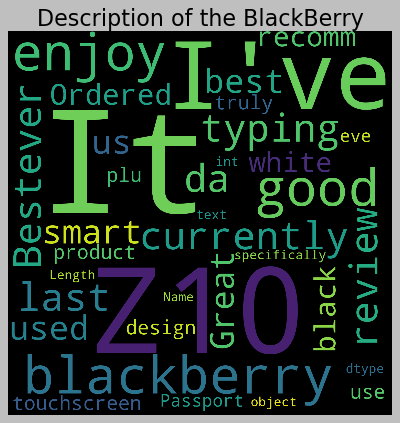

In [18]:
stopwords4 = set(STOPWORDS)
stopwords4.update(["phone","The","For",'could',"I've","bought",'It','For','except','Name','using','nice'])

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('classic')

wc = WordCloud(stopwords=stopwords4, background_color = 'black', width = 1500, height = 1500).generate(str(BlackBerrytext["text"]))
plt.title('Description of the BlackBerry', fontsize = 20)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [21]:
## Apple
key6 = {'text':Apple.reviewText}
Appletext = pd.DataFrame.from_dict(key6)

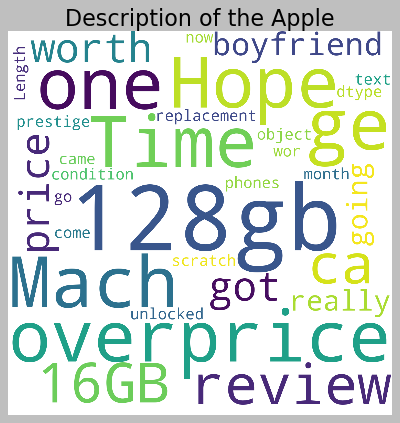

In [23]:
stopwords5 = set(STOPWORDS)
stopwords5.update(["phone","The","For",'could',"I've","bought",'It','For','except','Name','This','even','iPhone','version','people','buys'])

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('classic')

wc = WordCloud(stopwords=stopwords5, background_color = 'white', width = 1500, height = 1500).generate(str(Appletext["text"]))
plt.title('Description of the Apple', fontsize = 20)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [21]:
## LG
key6 = {'text':LG.reviewText}
LGtext = pd.DataFrame.from_dict(key6)

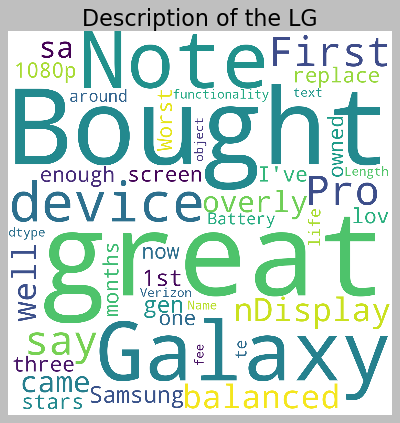

In [22]:
stopwords6 = set(STOPWORDS)
stopwords6.update(["phone","The","For",'could',"I've","bought",'It','For','except','Name','Bought'])

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('classic')

wc = WordCloud(stopwords=stopwords6, background_color = 'white', width = 1500, height = 1500).generate(str(LGtext["text"]))
plt.title('Description of the LG', fontsize = 20)
plt.imshow(wc)
plt.axis('off')
plt.show()